<a href="https://colab.research.google.com/github/protocol-streams/querent-experimental/blob/main/BERT_NER%20(TBD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [4]:
# Import necessary libraries
from transformers import pipeline

# Define the pipeline
nlp = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Define the text
text = "Google LLC is an American multinational technology company that specializes in Internet-related services and products. These include online advertising technologies, search, cloud computing, software, and hardware."

# Use the pipeline to extract entities
ner_results = nlp(text)

# Print the extracted entities
for entity in ner_results:
    print(f"Entity: {entity['entity']}, Value: {entity['word']}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entity: I-ORG, Value: Google
Entity: I-ORG, Value: LLC
Entity: I-MISC, Value: American
Entity: I-MISC, Value: Internet


In [6]:
# Import necessary libraries
from transformers import pipeline

# Define the pipeline
nlp = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Define the text
text = " I am eating apple inside Google LLC"

# Use the pipeline to extract entities
ner_results = nlp(text)

# Print the extracted entities
for entity in ner_results:
    print(f"Entity: {entity['entity']}, Value: {entity['word']}")

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entity: I-ORG, Value: Google
Entity: I-ORG, Value: LLC


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/corpus-data/

/content/drive/MyDrive/corpus-data


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.drop(['POS'], axis =1) #dont need parts of speech tags
data = data.fillna(method="ffill")
#data.tail(30)

In [12]:
'''
geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon
'''
data['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [4]:
#data['Sentence #'].value_counts()
words = set(list(data['Word'].values))
words.add('PADword')
n_words = len(words)
n_words
tags = list(set(data["Tag"].values))
n_tags = len(tags)
n_tags

17

In [5]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [6]:
getter = SentenceGetter(data)
sent = getter.get_next()
for i in sent:
  print(i)

('Thousands', 'O')
('of', 'O')
('demonstrators', 'O')
('have', 'O')
('marched', 'O')
('through', 'O')
('London', 'B-geo')
('to', 'O')
('protest', 'O')
('the', 'O')
('war', 'O')
('in', 'O')
('Iraq', 'B-geo')
('and', 'O')
('demand', 'O')
('the', 'O')
('withdrawal', 'O')
('of', 'O')
('British', 'B-gpe')
('troops', 'O')
('from', 'O')
('that', 'O')
('country', 'O')
('.', 'O')


In [7]:
sentences = getter.sentences
print(len(sentences))
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}
print(words2index['London'])
print(tags2index['B-geo'])
max_len = 50
X = [[w[0] for w in s] for s in sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
new_X[15]

47959
biggest sentence has 104 words
5461
4


['Israeli',
 'officials',
 'say',
 'Prime',
 'Minister',
 'Ariel',
 'Sharon',
 'will',
 'undergo',
 'a',
 'medical',
 'procedure',
 'Thursday',
 'to',
 'close',
 'a',
 'tiny',
 'hole',
 'in',
 'his',
 'heart',
 'discovered',
 'during',
 'treatment',
 'for',
 'a',
 'minor',
 'stroke',
 'suffered',
 'last',
 'month',
 '.',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword']

In [8]:
#from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2021)


In [ ]:
!pip install tensorflow==2.13.0
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==2.13.0

In [9]:
import tensorflow as tf1
print(tf1.__version__)

2.13.0


In [10]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)


TF version: 2.13.0
Hub version: 0.14.0


In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

batch_size = 32

# Assuming X_tr and y_tr are already defined, we can slice them directly
X_tr, X_val = X_tr[:1213*batch_size], X_tr[-135*batch_size:]
y_tr, y_val = y_tr[:1213*batch_size], y_tr[-135*batch_size:]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

#elmo_model = hub.KerasLayer("https://tfhub.dev/google/elmo/2", trainable=True)

# In TF2.x, there's no need to manually initialize variables like in TF1.x



In [22]:
elmo_model = hub.KerasLayer("https://tfhub.dev/google/elmo/3", trainable=False)

def ElmoEmbedding(x):
    return elmo_model(tf.squeeze(tf.cast(x, tf.string)))

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Bidirectional, LSTM, Dense, TimeDistributed, Dropout, Add

input_text = Input(shape=(max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(1024,))(input_text)
x = Dense(units=512, activation='relu')(embedding)
out = Dense(n_tags, activation="softmax")(x)
model = Model(input_text, out)




The following Variables were used a Lambda layer's call (lambda_6), but
are not present in its tracked objects:
  <tf.Variable 'bilm/char_embed:0' shape=(261, 16) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_0:0' shape=(1, 1, 16, 32) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_0:0' shape=(32,) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_1:0' shape=(1, 2, 16, 32) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_1:0' shape=(32,) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_2:0' shape=(1, 3, 16, 64) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_2:0' shape=(64,) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_3:0' shape=(1, 4, 16, 128) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_3:0' shape=(128,) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_4:0' shape=(1, 5, 16, 256) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_4:0' shape=(256,) dtype=float32>
  <tf.Variable 'bilm/CNN/W_cnn_5:0' shape=(1, 6, 16, 512) dtype=float32>
  <tf.Variable 'bilm/CNN/b_cnn_5:0' shape=(512,) dtype=float32>
  <tf.

In [23]:
tag_model = Model(input_text, out)
tag_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [24]:
tag_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50)]              0         
                                                                 
 lambda_6 (Lambda)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 17)                8721      
                                                                 
Total params: 533521 (2.04 MB)
Trainable params: 533521 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


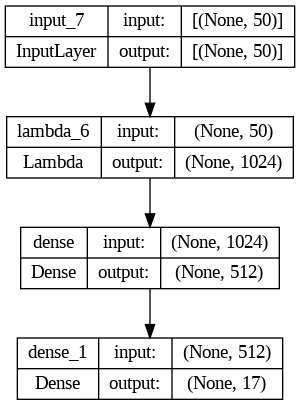

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(tag_model,'Elmo_tag.png',show_shapes= True)